# Introduction
* This kernel is notes that I took for **ANN**. This is not a tutorial you can think that kernel as a cheatsheet for **ANN**. While coding a kernel open this in a new tab and copy paste.
<img src = "https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png" width = "600" height = "322" />

### This kernel is a part of a big series:
* [Data Science Notes1: Matplotlib](https://www.kaggle.com/mrhippo/data-science-notes1-matplotlib)
* [Data Science Notes2: Seaborn](https://www.kaggle.com/mrhippo/data-science-notes2-seaborn)
* [Data Science Notes3: Plotly](https://www.kaggle.com/mrhippo/data-science-notes3-plotly)
* [Data Science Notes4: Machine Learning (ML)](https://www.kaggle.com/mrhippo/data-science-notes4-machine-learning)
* Data Science Notes5: Deep Learning: ANN 
* [Data Science Notes6: Deep Learning: CNN](https://www.kaggle.com/mrhippo/data-science-notes6-deep-learning-cnn)
* [Data Science Notes7: Deep Learning: RNN and LSTM](https://www.kaggle.com/mrhippo/data-science-notes7-deep-learning-rnn-and-lstm)

### This kernel will be updated

## Content
* [Imports and Preprocessing](#1)
* [ANN Model](#2)
* [Classification](#3)
* [Conclusion](#4)

<a id="1"></a> <br>
# Imports and Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Input, ReLU, LeakyReLU, BatchNormalization
from keras.models import Model, Sequential
from keras.optimizers import Adam

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(["id","Unnamed: 32"],axis = 1) #these columns are irrelevant for model

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


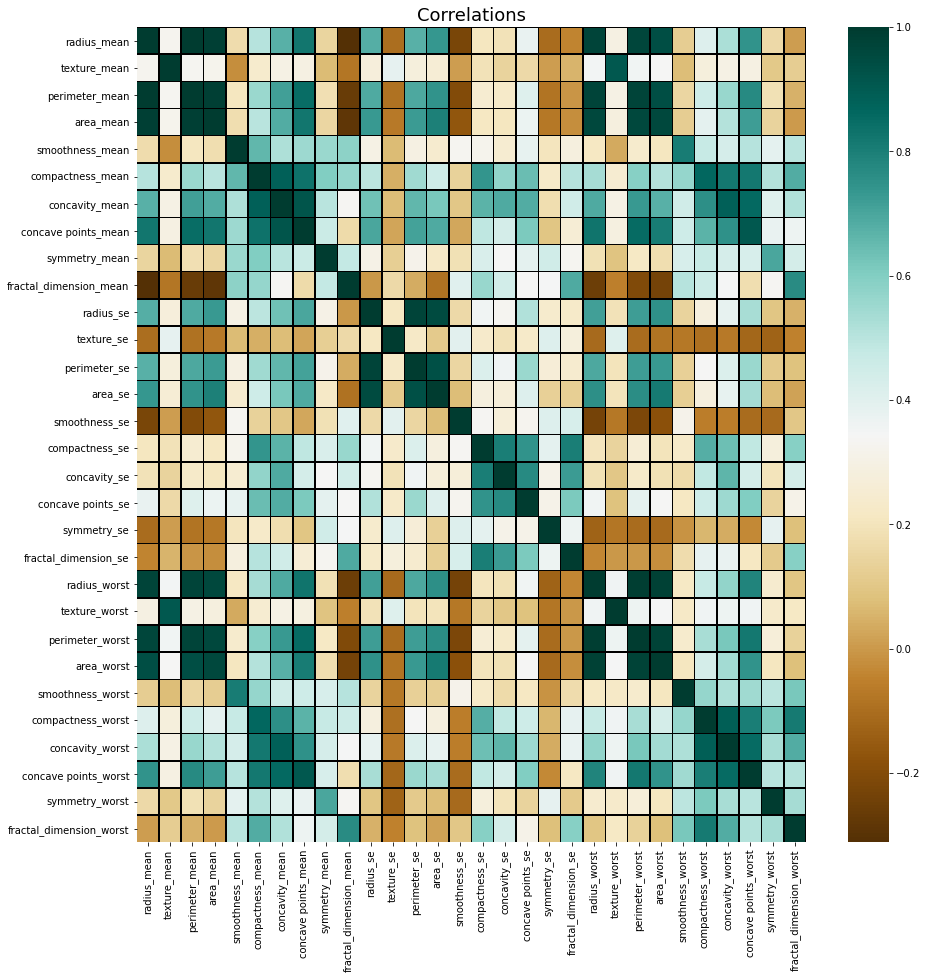

In [7]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),linecolor = "black", linewidths=0.5, fmt = '.2f', ax=ax,cmap = "BrBG")
plt.title("Correlations",fontsize = 18)
plt.show()

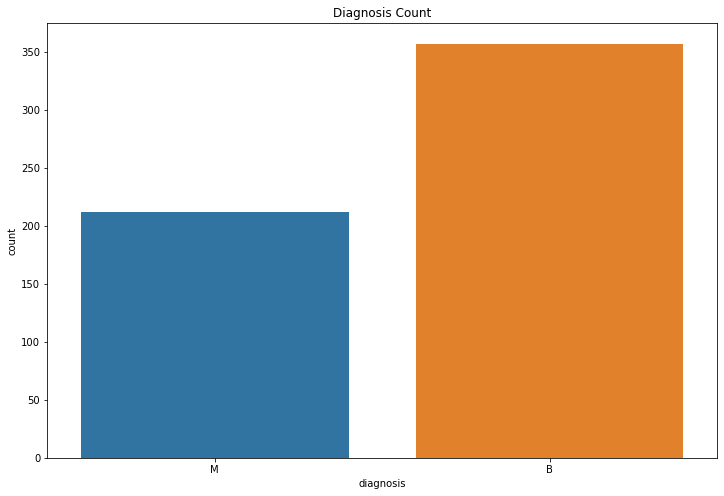

In [8]:
fig = plt.figure(figsize = (12,8))
sns.countplot(df["diagnosis"])
plt.title("Diagnosis Count")
plt.show()

In [9]:
# preparing data parts for boxplot visualization
df_for_box1 = df[df.columns[1:11]]
df_for_box2 = df[df.columns[11:21]]
df_for_box3 = df[df.columns[21:31]]

In [10]:
df_for_box1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [11]:
df_for_box2.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [12]:
df_for_box3.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


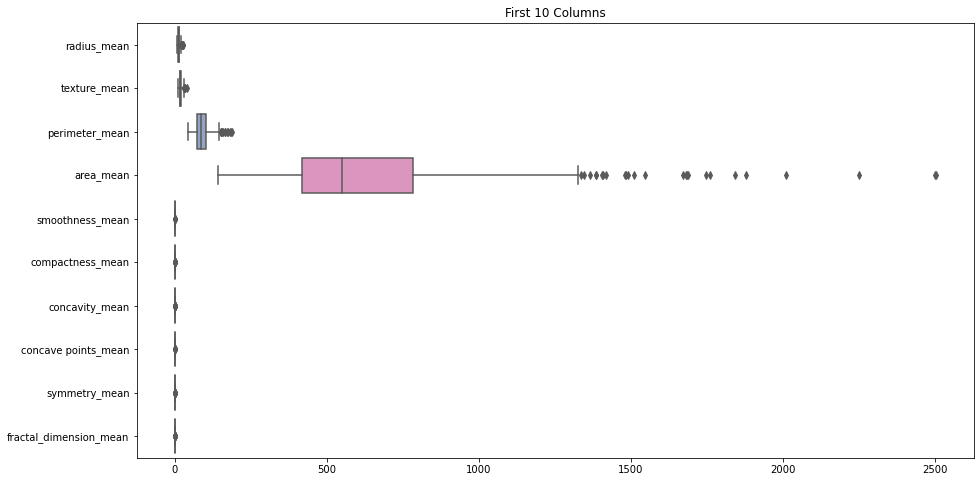

In [13]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df_for_box1, orient="h", palette="Set2")
plt.title("First 10 Columns")
plt.show()

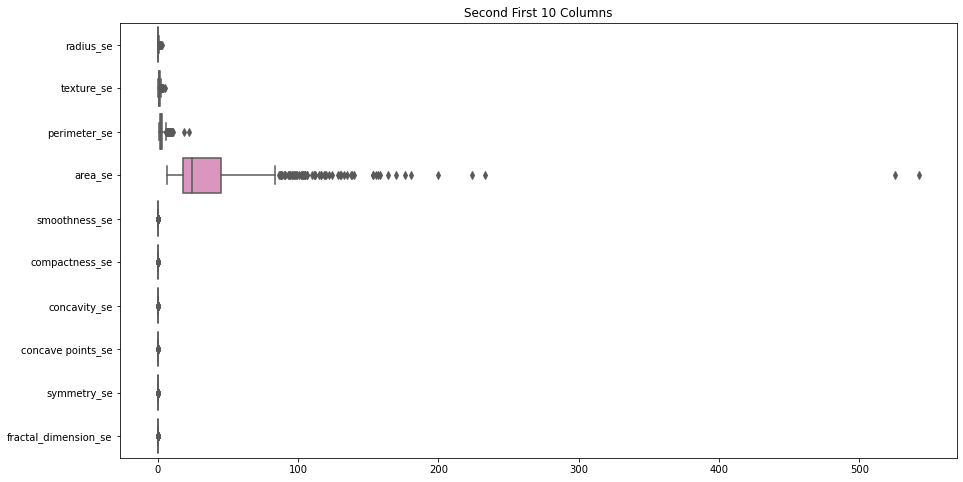

In [14]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df_for_box2, orient="h", palette="Set2")
plt.title("Second First 10 Columns")
plt.show()

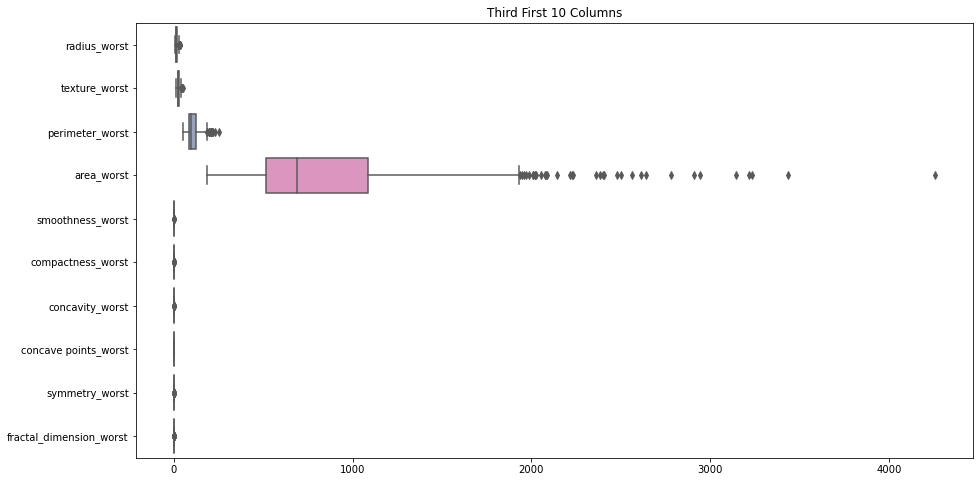

In [15]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df_for_box3, orient="h", palette="Set2")
plt.title("Third First 10 Columns")
plt.show()

In [16]:
df["diagnosis"] = [1 if each == "M" else 0 for each in df["diagnosis"]] # M -> 1, B -> 0

In [17]:
data_target = df["diagnosis"]
data_values = df.drop(["diagnosis"],axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_values,data_target,test_size = 0.2, random_state = 42)

In [19]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (455, 30)
y_train shape:  (455,)
x_test shape:  (114, 30)
y_test shape:  (114,)


In [20]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("changed y_train shape for keras",y_train.shape)
print("changed y_test shape for keras",y_test.shape)

changed y_train shape for keras (455, 1)
changed y_test shape for keras (114, 1)


In [21]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)

><img src = "https://miro.medium.com/max/875/1*FMObR2cUnMi38O-_jhxCgw.png" width = "600" height = "322" />

In [22]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

><img src = "https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF" />

<a id="2"></a> <br>
># ANN Model
>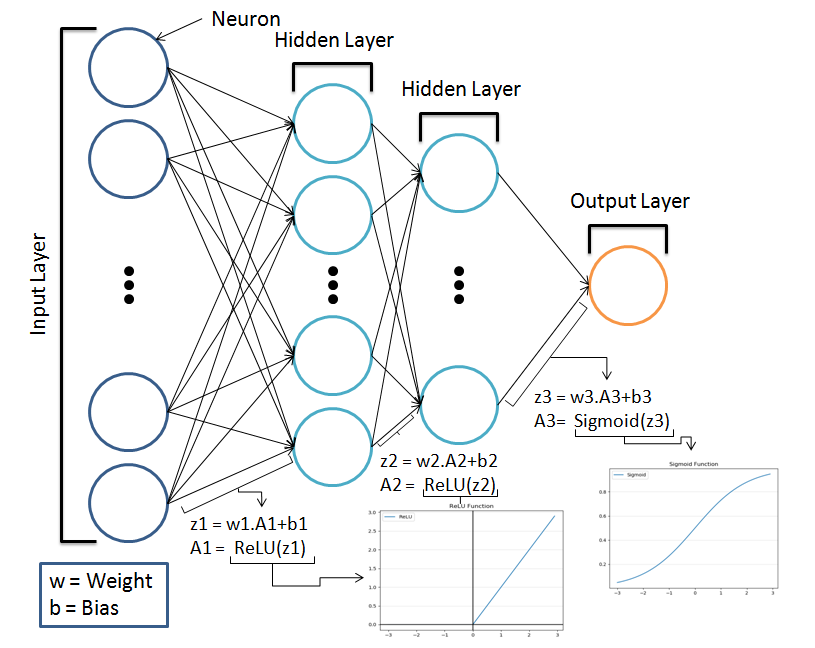

> ## 1. General Terms:
> * **Forward Propagation:** In forward propagation model makes calculations(you can see the calculations on diagram) for prediction and creates a loss.
> * **Backward Propagation:** In backward propagation model takes the loss that created in forward propagation and updates the weights. Backward Propagation Formula:
><img src = "http://image.ibb.co/hYTTJH/8.jpg" width = "270" height = "160" />
> * **Epoch:** Epoch is how many times we will train the model.
> * **Loss(Cost or Error):** Loss is how our model's predictions are precise.
> * **Learning Rate:** Learning rate is how fast our model learning is. If it is too much then it will miss the mininmum loss, if it is too small then it cannot reach the minimum loss. 
> <img src = "https://devhunteryz.files.wordpress.com/2018/08/7de20-0fa9umdxdzyzuopeo.jpg?w=640" width = "400" height = "400" />
> * **Batch Size:** Batch size is **how many samples you will get from data in 1 epoch.** For example: if you have a **data with 2000 samples** and **batch size is 500**, it will take **4 iterations** to complete **1 epoch**.
>    * **Types of Batch Sizes:**
>        * Batch Gradient Descent: Batch Size = Size of Training Set
>        * Stochastic Gradient Descent: Batch Size = 1
>        * Mini-Batch Gradient Descent: 1 < Batch Size < Size of Training Set
> * **Overfit:** In overfit our model can predict train data but cannot predict the test data. **Cause of overfit is linearity**, if we have a model that is linear too much then we have to **increase the nonlinearity. To do that we can use: Dropout, batch normalization, build a less complex model, early stopping and reduce the number of layers.** 
><img src = "https://www.educative.io/api/edpresso/shot/6668977167138816/image/5033807687188480" width = "600" height = "400" />
>
> ## 2. Dense Layer:
> * Dense layer is a normal layer that contains neurons of the network.
>
>## 3. Activation Function:
>* Activation functions are functions for taking derivative and increasing nonlinearity.
>* **Types of Activation Functions:**
>    * **Sigmoid:** Most standard activation function, sigmoid **compresses a value between 0 and 1.** But now in deep learning we use it for classification in output layer. **When you should use:** If you are doing binary classification.
>    * **Tanh:** Tanh **compresses a value between -1 and 1.** Better than sigmoid(nonlinearity is higher). **When you should use:** There is no a certain time to use it, sometimes it might increase accuracy.
>    * **Linear:** It gives the same value as the input value. Sometimes useful. **When you should use:** If you are doing regression.
>    * **ReLU:** Most effective activation function. In ReLU all **values that less than 0 equalizes to 0** and **values that higher than 0 outputs as same as input(-2=0, 0=0, 5=5)**. ReLU is much effective and faster than other functions(6x faster). But it has a problem: **neurons with negative weights dies.** **When you should use:** You can use it any model and time.
>    * **Leaky ReLU:** Almost same as ReLU. But the difference is it has a leak. What we mean by saying leak is: this functions **does not equalizes the values that are less than 0.** As a result of that **neurons that with negative weights do not die.** **When you should use:** When ReLU fails.
>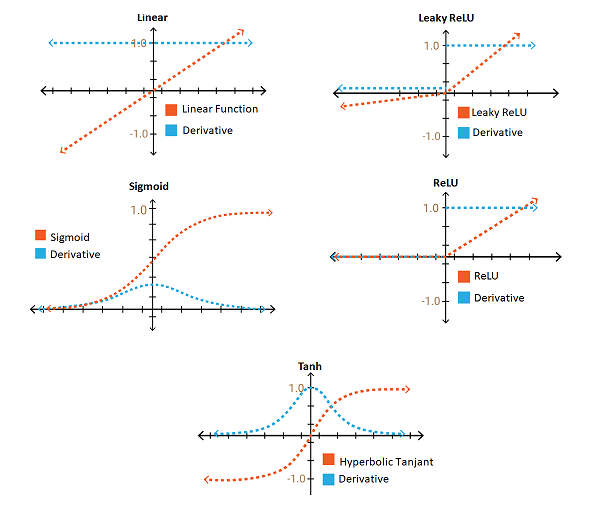
>
>## 4. Optimizer:
>![Cost](https://mlfromscratch.com/content/images/2019/12/gradient-descent-optimized--1-.gif)
>![Optimizer comparison](https://user-images.githubusercontent.com/8075494/47049048-2a3a4300-d16a-11e8-992d-c21288c6cfac.gif)
>* **Stochastic Gradient Descent(SGD):** The basic difference between batch gradient descent (BGD) and stochastic gradient descent (SGD), is that we only calculate the >cost of one example for each step in SGD, but in BGD, we have to calculate the cost for all training examples in the dataset. Trivially, this speeds up neural networks >greatly. Exactly this is the motivation behind SGD.
>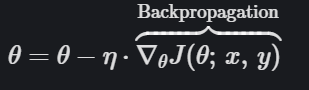
>* The equation for SGD is used to update parameters in a neural network – we use the equation to update parameters in a backwards pass, using backpropagation to calculate the gradient ∇:
>* This is how the equation is presented formally, and here is what each symbol means: 
>* θ is a parameter (theta), e.g. your weights, biases and activations. Notice that we only update a single parameter for the neural network here, i.e. we could update a single weight.
>* η is the learning rate (eta), but also sometimes alpha α or gamma γ is used.
>* J is formally known as objective function, but most often it's called cost function or loss function.
>* We take each parameter theta θ and update it by taking the original parameter θ and subtract the learning rate η times the ratio of change ∇J(θ).
>
>
>* **AdaGrad:** Adaptive Gradients (AdaGrad) provides us with a simple approach, for changing the learning rate over time. This is important for adapting to the differences in datasets, since we can get small or large updates, according to how the learning rate is defined.
>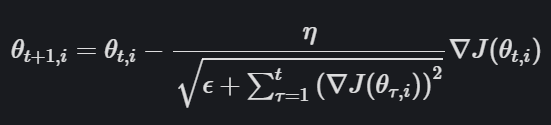 
>* Let's go for a top to bottom approach; here is the equation:
>* All we added here is division of the learning rate eta η. Although I told you that ϵ sometimes is the learning rate, in this algorithm it is not. In fact, it's just a small value that ensures that we don't divide by zero.
>
>
>* **RMSprop:** Root Mean Squared Propagation (RMSprop) is very close to Adagrad, except for it does not provide the sum of the gradients, but instead an exponentially decaying average. This decaying average is realized through combining the Momentum algorithm and Adagrad algorithm, with a new term.
>* An important property of RMSprop is that we are not restricted to just the sum of the past gradients, but instead we are more restricted to gradients for the recent time steps. This means that RMSprop changes the learning rate slower than Adagrad, but still reaps the benefits of converging relatively fast – as has been shown (and we won't go into those details here).
>![RMSprop](https://mlfromscratch.com/content/images/2019/12/rmsprop.gif)
>
>* **Adam:** Adam uses Momentum and Adaptive Learning Rates to converge faster. We have already explored what Momentum means, now we are going to explore what adaptive learning rates means.
>* **Most of the time Adam is better** than others so you can use it as **common one.** 
>
>![Optimizers](https://mlfromscratch.com/content/images/2019/12/saddle.gif)
>
>## 5. Loss Function:
>* **Mean Squared Error(MSE):** MSE is the average of the squared error that is used as the loss function for least squares regression:
><img src = "https://www.oreilly.com/library/view/machine-learning-with/9781785889936/assets/image_07_002.jpg" width = "350" height = "180" align = "right" />
>* It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points.
>* RMSE is the square root of MSE. MSE is measured in units that are the square of the target variable, while RMSE is measured in the same units as the target variable. Due to its formulation, MSE, just like the squared loss function that it derives from, effectively penalizes larger errors more severely.
>
>
>* **Binary Cross-Entropy:** It is intended for use with binary classification where the target values are in the set {0, 1}.
>* Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.
><img src = "https://miro.medium.com/max/875/1*PK0iVgkQepmVCprtTgbsGg.png" width = "500" height = "500" />
>
>
>* **Categorical Cross Entropy:** It is quite similar to BCE but has an extra summation term to sum over all output nodes which in formula is denoted as J.
Cost function works in tandem with softmax activation function. Softmax is a generalised sigmoid activation function for K outputs. It is required because individually outputs would not sum up to 1 so we need to normalise it and thats what softmax does for us.
><img src = "https://miro.medium.com/max/875/1*AlbV9jz2k3Ll1wEMCljdSg.png" width = "500" height = "500" />
>
>## 6. Dropout:
>* Dropout is a technique for **increasing nonlinearity.** In dropout we are **dropping some of the neurons**, this technique is good way to fight with **overfitting.** 
>* **When you should use:** When you are facing with a overfitting issue.
><img src = "https://miro.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png" width = "500" height = "400" />
>
>## 7. Batch Normalization:
>* Batch normalization is a technique to handle neurons that have outstanding weights. These neurons might cause problem in your model.
>* **When you should use:** When your model is complex.
><img src = "https://d3i71xaburhd42.cloudfront.net/521ebc310afd88a2672f0af5f77dd4e6ec5c994f/4-Figure2-1.png" width = "700" height = "450" />

<a id="3"></a> <br>
# Classification

>## Binary Classification
>* **Our model's diagram:**
>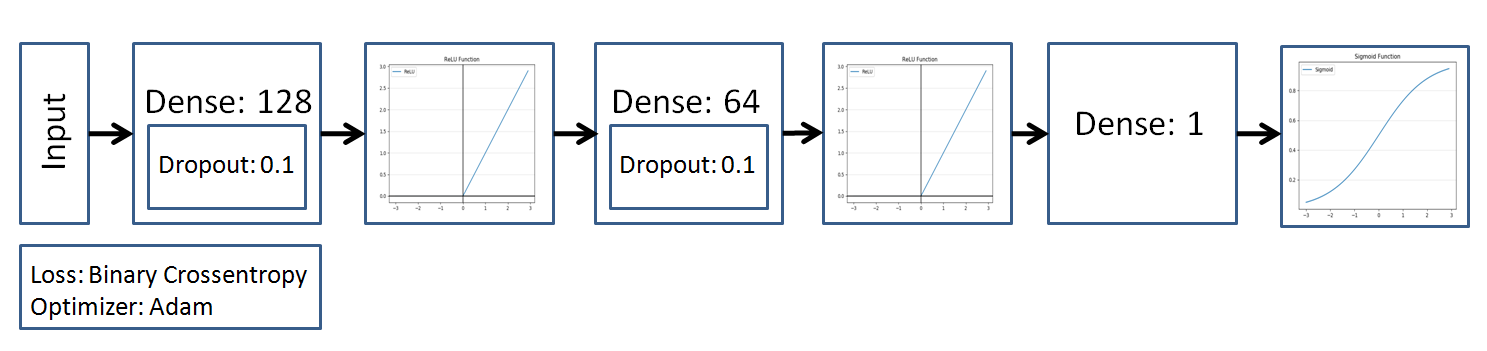

In [23]:
model = Sequential()

model.add(Dense(128, input_shape = (455, 30)))
model.add(ReLU())
model.add(Dropout(0.1))

model.add(Dense(64))
model.add(ReLU())
model.add(Dropout(0.1))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

history = model.fit(x_train,y_train,epochs = 20, batch_size = 5,validation_data = (x_test,y_test))

Epoch 1/20
91/91 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.9011 - val_loss: 0.0985 - val_accuracy: 0.9649
Epoch 2/20
91/91 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9473 - val_loss: 0.0693 - val_accuracy: 0.9649
Epoch 3/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9714 - val_loss: 0.0725 - val_accuracy: 0.9474
Epoch 4/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9780 - val_loss: 0.0467 - val_accuracy: 0.9825
Epoch 5/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9758 - val_loss: 0.0452 - val_accuracy: 0.9825
Epoch 6/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9802 - val_loss: 0.0583 - val_accuracy: 0.9737
Epoch 7/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9758 - val_loss: 0.0474 - val_accuracy: 0.9912
Epoch 8/20
91/91 [==

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

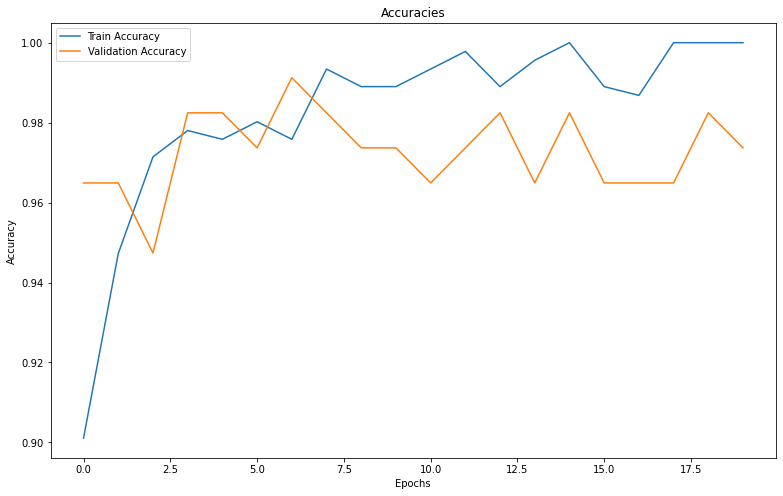

In [25]:
plt.figure(figsize = (13,8))
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

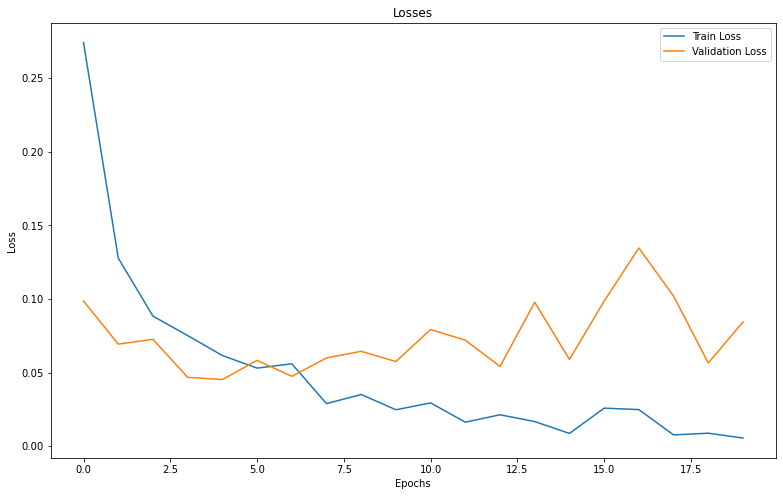

In [26]:
plt.figure(figsize = (13,8))
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

>## Multiclass Classification
>* **Our model's diagram:**
>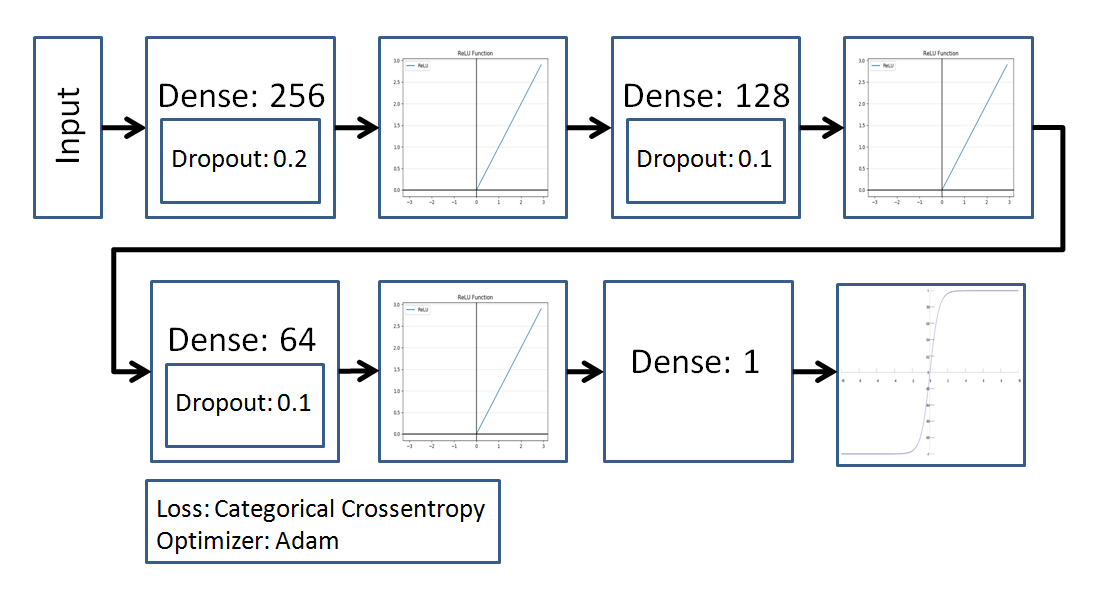

In [27]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


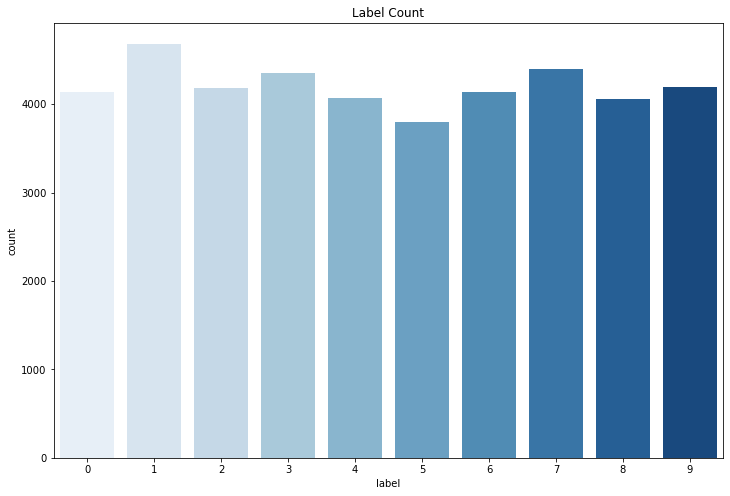

In [28]:
fig = plt.figure(figsize = (12,8))
sns.countplot(df["label"],palette = "Blues")
plt.title("Label Count")
plt.show()

In [29]:
df_target = df["label"]
df_values = df.drop(["label"], axis = 1)/255.0 # normalization

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df_values,df_target,test_size = 0.2, random_state = 42)

In [31]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

In [32]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (33600, 784)
y_train shape:  (33600, 10)
x_test shape:  (8400, 784)
y_test shape:  (8400, 10)


>### Softmax Activation Function
>* Softmax activation function is a activation function for **multiclass classification.** **When you should use:** When you are doing multiclass classification.
>
>
><img src = "https://www.researchgate.net/profile/Shen_Leixian/publication/325856086/figure/fig1/AS:723221292789765@1549440801787/Softmax-function-image.png" />

In [33]:
model = Sequential()

model.add(Dense(256, input_shape = (33600, 784)))
model.add(ReLU())
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(ReLU())
model.add(Dropout(0.1))

model.add(Dense(64))
model.add(ReLU())
model.add(Dropout(0.1))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

history = model.fit(x_train,y_train,epochs = 30, batch_size = 100,validation_data = (x_test,y_test))

Epoch 1/30
336/336 [==============================] - 2s 5ms/step - loss: 0.4380 - accuracy: 0.8660 - val_loss: 0.1742 - val_accuracy: 0.9486
Epoch 2/30
336/336 [==============================] - 2s 5ms/step - loss: 0.1745 - accuracy: 0.9476 - val_loss: 0.1297 - val_accuracy: 0.9619
Epoch 3/30
336/336 [==============================] - 2s 5ms/step - loss: 0.1250 - accuracy: 0.9626 - val_loss: 0.1035 - val_accuracy: 0.9693
Epoch 4/30
336/336 [==============================] - 2s 5ms/step - loss: 0.1018 - accuracy: 0.9696 - val_loss: 0.1029 - val_accuracy: 0.9679
Epoch 5/30
336/336 [==============================] - 2s 5ms/step - loss: 0.0838 - accuracy: 0.9740 - val_loss: 0.0909 - val_accuracy: 0.9720
Epoch 6/30
336/336 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9784 - val_loss: 0.0865 - val_accuracy: 0.9725
Epoch 7/30
336/336 [==============================] - 2s 5ms/step - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0913 - val_accuracy: 0.9731
Epoch 

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

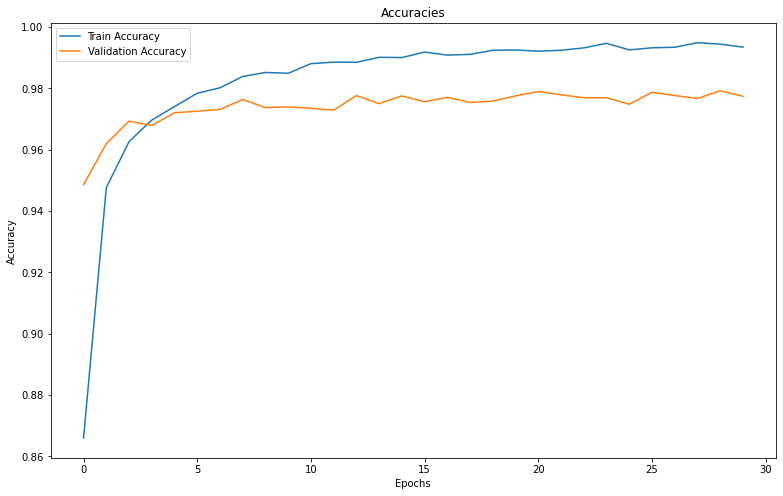

In [35]:
plt.figure(figsize = (13,8))
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

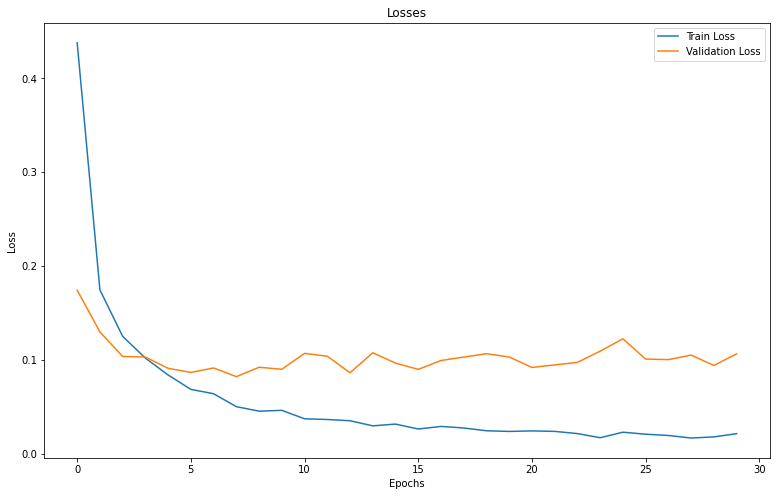

In [36]:
plt.figure(figsize = (13,8))
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<a id="4"></a> <br>
# Conclusion
* **If there is something wrong with this kernel please let me know in the comments.**


### My other kernels: https://www.kaggle.com/mrhippo/notebooks

* **References:**
* https://www.colabug.com/2019/0509/6168827/
* https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
* https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
* https://www.researchgate.net/figure/Illustration-of-output-of-ELU-vs-ReLU-vs-Leaky-ReLU-function-with-varying-input-values_fig8_334389306
* https://mlfromscratch.com/optimizers-explained/#stochastic-gradient-descent
* https://www.oreilly.com/library/view/machine-learning-with/9781785889936/669125cc-ce5c-4507-a28e-065ebfda8f86.xhtml#:~:text=MSE%20is%20the%20average%20of,the%20number%20of%20data%20points.
* https://rnrahman.com/blog/visualising-stochastic-optimisers/
* https://devhunteryz.wordpress.com/2018/08/27/yapay-sinir-aglarindaki-hiperparametreler/
* https://medium.com/@dmitrijtichonov/debunking-loss-functions-in-deep-learning-4b9abc4c8d4c
* https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
* https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5
* https://www.semanticscholar.org/paper/Understanding-Batch-Normalization-Bjorck-Gomes/521ebc310afd88a2672f0af5f77dd4e6ec5c994f
* https://www.youtube.com/watch?v=dXB-KQYkzNU
* https://www.educative.io/edpresso/overfitting-and-underfitting
* https://scikit-learn.org/stable/modules/preprocessing.html
* https://www.tensorflow.org/guide/keras/train_and_evaluate
* https://medium.com/@anuj_shah/breaking-the-ice-with-batch-normalization-bbc41dab8403
* https://datasciencewithshobhit.blogspot.com/2019/02/feature-scaling-in-scikit-learn.html
* https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python